In [9]:
# 安装必要库
!pip install scikit-learn -q

# 导入工具包
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from google.colab import files

# 上传文件
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# 展示前几行
df.head()


Saving amazon_reviews_final_cleaned_v2.csv to amazon_reviews_final_cleaned_v2.csv


,brand,text,created_at,label,rating,lang,cleaned_text
0,Apple,"No charger. Every thing is good about iPhones,...",2024-11-08,positive,4,en,charger every thing good iphones theres nothin...
1,Apple,"iPhone 13 256GB. It look so fabulous, I am and...",2024-08-16,positive,5,en,iphone gb look fabulous android user switched ...
2,Apple,Flip camera option nill. I tried to flip camer...,2024-05-14,positive,4,en,flip camera option nill tried flip camera reco...
3,Apple,Good product. Happy to get the iPhone 13 in Am...,2024-05-18,positive,5,en,good product happy get iphone amazon offer
4,Apple,Too smooth and effective battery life. 5 star ...,2024-05-14,positive,5,en,smooth effective battery life star


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 去除空值与空字符串
df = df[df['cleaned_text'].notnull() & (df['cleaned_text'].str.strip() != '')]

# 标签编码
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# 分品牌比例划分（groupby + stratify）
train_dfs = []
val_dfs = []

for brand, group in df.groupby('brand'):
    X = group['cleaned_text']
    y = group['label_encoded']
    group_train_X, group_val_X, group_train_y, group_val_y = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    train_dfs.append(
        pd.DataFrame({'cleaned_text': group_train_X, 'label_encoded': group_train_y})
    )
    val_dfs.append(
        pd.DataFrame({'cleaned_text': group_val_X, 'label_encoded': group_val_y})
    )

# 合并各品牌的训练集和验证集
train_df = pd.concat(train_dfs).reset_index(drop=True)
val_df = pd.concat(val_dfs).reset_index(drop=True)

print(f"训练集数量：{len(train_df)}")
print(f"验证集数量：{len(val_df)}")


训练集数量：21226
验证集数量：5307


<ipython-input-10-1c02520c19a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_encoded'] = label_encoder.fit_transform(df['label'])



🔁 正在运行第 1/8 个组合
➡️ 参数：max_features=3000, ngram_range=(1, 1), C=0.5
✅ Accuracy: 0.8336 | F1: 0.8171 | ⏱️运行时间: 3.32 秒

🔁 正在运行第 2/8 个组合
➡️ 参数：max_features=3000, ngram_range=(1, 1), C=1.0
✅ Accuracy: 0.8308 | F1: 0.8177 | ⏱️运行时间: 3.52 秒

🔁 正在运行第 3/8 个组合
➡️ 参数：max_features=3000, ngram_range=(1, 2), C=0.5
✅ Accuracy: 0.8364 | F1: 0.8211 | ⏱️运行时间: 9.7 秒

🔁 正在运行第 4/8 个组合
➡️ 参数：max_features=3000, ngram_range=(1, 2), C=1.0
✅ Accuracy: 0.8347 | F1: 0.8223 | ⏱️运行时间: 3.96 秒

🔁 正在运行第 5/8 个组合
➡️ 参数：max_features=5000, ngram_range=(1, 1), C=0.5
✅ Accuracy: 0.8374 | F1: 0.8214 | ⏱️运行时间: 1.96 秒

🔁 正在运行第 6/8 个组合
➡️ 参数：max_features=5000, ngram_range=(1, 1), C=1.0
✅ Accuracy: 0.8314 | F1: 0.8179 | ⏱️运行时间: 1.78 秒

🔁 正在运行第 7/8 个组合
➡️ 参数：max_features=5000, ngram_range=(1, 2), C=0.5
✅ Accuracy: 0.8413 | F1: 0.8263 | ⏱️运行时间: 3.57 秒

🔁 正在运行第 8/8 个组合
➡️ 参数：max_features=5000, ngram_range=(1, 2), C=1.0
✅ Accuracy: 0.8357 | F1: 0.8241 | ⏱️运行时间: 4.44 秒

📊 所有参数组合结果（按 F1 排序）：


,max_features,ngram_range,C,accuracy,f1,time_sec
0,5000,"(1, 2)",0.5,0.841342,0.826330,3.57
1,5000,"(1, 2)",1.0,0.835689,0.824144,4.44
2,3000,"(1, 2)",1.0,0.834747,0.822304,3.96
3,5000,"(1, 1)",0.5,0.837385,0.821368,1.96
4,3000,"(1, 2)",0.5,0.836442,0.821060,9.70
5,5000,"(1, 1)",1.0,0.831355,0.817897,1.78
6,3000,"(1, 1)",1.0,0.830790,0.817677,3.52
7,3000,"(1, 1)",0.5,0.833616,0.817062,3.32


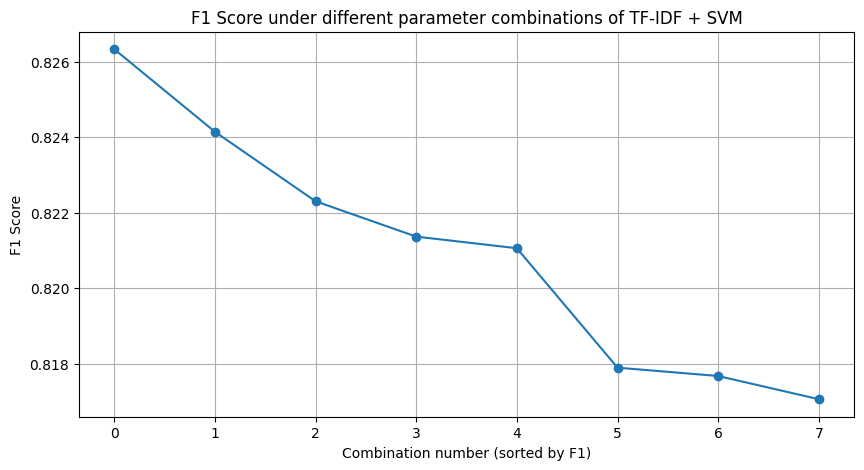

In [11]:
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
import itertools

# 超参数组合设置
max_features_list = [3000, 5000]
ngram_ranges = [(1,1), (1,2)]
C_values = [0.5, 1.0]

# 构造所有组合
param_combinations = list(itertools.product(max_features_list, ngram_ranges, C_values))

# 存储结果
results = []

# 循环运行不同组合
for i, (max_feat, ngram, C_val) in enumerate(param_combinations):
    print(f"\n🔁 正在运行第 {i+1}/{len(param_combinations)} 个组合")
    print(f"➡️ 参数：max_features={max_feat}, ngram_range={ngram}, C={C_val}")

    # 定义管道
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=max_feat, ngram_range=ngram)),
        ('svm', LinearSVC(C=C_val, max_iter=1000))
    ])

    # 训练并计时
    start_time = time.time()
    pipeline.fit(train_df['cleaned_text'], train_df['label_encoded'])
    val_preds = pipeline.predict(val_df['cleaned_text'])
    end_time = time.time()

    # 评估指标
    acc = accuracy_score(val_df['label_encoded'], val_preds)
    f1 = f1_score(val_df['label_encoded'], val_preds, average='weighted')
    duration = round(end_time - start_time, 2)

    print(f"✅ Accuracy: {acc:.4f} | F1: {f1:.4f} | ⏱️运行时间: {duration} 秒")

    results.append({
        'max_features': max_feat,
        'ngram_range': ngram,
        'C': C_val,
        'accuracy': acc,
        'f1': f1,
        'time_sec': duration
    })

# 输出结果表格
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='f1', ascending=False).reset_index(drop=True)

import matplotlib.pyplot as plt

print("\n📊 所有参数组合结果（按 F1 排序）：")
display(results_df)

# 可视化 F1 得分
plt.figure(figsize=(10, 5))
plt.plot(results_df['f1'], marker='o')
plt.title('F1 Score under different parameter combinations of TF-IDF + SVM')
plt.xlabel('Combination number (sorted by F1)')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()
